In [1]:
#calcuration libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import statistics
import csv
import os
%matplotlib inline

In [2]:
# Material properties for Ethylen Glycol
A = 2.0148;
B = 4.50E-3;
def cp(T):
    cp = (A + B * (T+273.15));
    return cp
def cp_K(T):
    cp_K = A + B * (T);
    cp_K =  cp_K *1000;##???
    return cp_K

C = 0.2134;
D = 6.071E-4;
def Lambda(T):
    Lambda = C + D * (T+273.15);
    return Lambda
def Lambda_K(T):
    Lambda_K = C + D * (T);
    return Lambda_K

E = 1.1001E-4;
F = 325.85;
G = -207.30;
def mu(T):
    mu = E * np.exp( F / ( (T+273.15) + G) );
    return mu
def mu_K(T):
    mu_K = E * np.exp( F / ( (T) + G) );
    return mu_K

H = 1268.28;
I = -0.66;
def rho(T):
    rho = H + I * (T+273.15);
    return rho
def rho_K(T):
    rho_K = H + I * (T);
    return rho_K

def nu(T):
    nu = mu(T)/rho(T);
    return nu
def nu_K(T):
    nu_K = mu_K(T)/rho_K(T);
    return nu

def Pr(T):
    Pr = ( mu(T) * cp(T) * 1000 ) / Lambda(T);
    return Pr
def Pr_K(T):
    Pr_K = ( mu_K(T) * cp_K(T)) / Lambda_K(T);
    return Pr

In [3]:
Pr_correlation = 10
di = 0.012
L = 2
#Tm = 66.4427
#Tw = 69.2297

In [4]:
Pr_w = Pr(Tw)
Pr_w     = Pr(Tw)
rho_w    = rho(Tw)
nu_w     = nu(Tw)
mu_w     = nu_w * rho_w
cp_w     = cp(Tw)
Lambda_w = Lambda(Tw)
Pr_m     = Pr(Tm)
rho_m    = rho(Tm)
nu_m     = nu(Tm)
mu_m     = nu_m * rho_m
cp_m     = cp(Tm)
Lambda_m = Lambda(Tm)

In [5]:
Re_lam = np.linspace(1,2300,)
Re_tran = np.linspace(2300,10000,)
Re_turb = np.linspace(10000,100000,)
#laminar
Nu_lam1 = 3.66
Nu_lam2 = 0.7
Nu_lam3 = 1.615 * (Re_lam * Pr_correlation * di / L)**(1/3)
Nu_lam = (Nu_lam1**3 + Nu_lam2**3 + Nu_lam3**3)**(1/3)
#turbulent
xi = (1.8 * np.log10(Re_turb) - 1.5)**(-2)
Nu_turb = ((xi/8 * Re_turb * Pr_correlation) / (1 + 12.7 * (xi/8)**0.5 * (Pr_correlation**(2/3) - 1))) * (1 + (di/L)**(2/3))
#transitional
c1 = Nu_lam[49]
c2 = Nu_turb[0]
r = (Re_tran - 2300) / (10**4 - 2300)
Nu_tran = (1 - r) * c1 + r * c2

#Dittus_Boelter correlation
NuDB = 0.027*Re_turb**0.8 * Pr_correlation**0.4
#Entrance factor
entrance_section = 1.2
n = 2.08E-6 * Re_turb - 0.815
Nu_entrance = 1 + 23.99 * Re_turb **(-0.23) * (entrance_section / di)**n
#Roughness factor
epcylon = 3.2E-6 #assumed
Nu_roughness = 0.091 * (epcylon / di)**(-0.125) * Re_turb**(0.363*(epcylon/di)**0.1)
#Viscosity factor

#Nu_viscosity = (mu_m / mu_w)**0.14
#Combining the four factors

#Nu_Robinson = NuDB * Nu_entrance * Nu_viscosity # * Nu_roughness

In [9]:
filename_pr10 = './Bertsche2016_pr10.dot.csv'
data_pr10 = np.array(pd.read_csv(filename_pr10, header=None))
Re_pr10 = data_pr10[:,0]
Nu_pr10 = data_pr10[:,1]

filename_pr13 = './Bertsche2016_pr13.dot.csv'
data_pr13 = np.array(pd.read_csv(filename_pr13, header=None))
Re_pr13 = data_pr13[:,0]
Nu_pr13 = data_pr13[:,1]

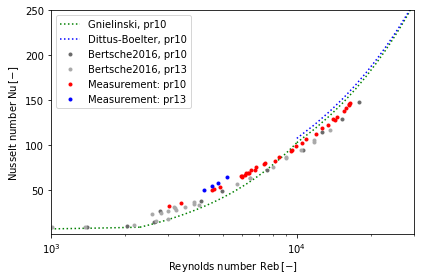

In [27]:
plt.xlim(1000,30000)
plt.ylim(1,250)
plt.semilogx(Re_lam, Nu_lam, color='green',linestyle="dotted", label="Gnielinski, pr10")
plt.semilogx(Re_tran, Nu_tran, color='green',linestyle="dotted")#, label="Gnielinski for transitional")
plt.semilogx(Re_turb, Nu_turb, color='green',linestyle="dotted")#, label="Gnielinski for turbulent")
plt.semilogx(Re_turb, NuDB, color='blue',linestyle="dotted", label="Dittus-Boelter, pr10")
#plt.semilogx(Re_turb, Nu_Robinson, color='red',linestyle="dotted", label="K.Robinson2003 without roughness factor, pr10")
plt.errorbar(Re_pr10, Nu_pr10, fmt='.', color='dimgray', elinewidth=3, capsize=1, label="Bertsche2016, pr10")
plt.errorbar(Re_pr13, Nu_pr13, fmt='.', color='darkgray', elinewidth=3, capsize=1, label="Bertsche2016, pr13")

#Daten_05.08.2019...
plt.errorbar(16401, 146.4495, fmt='.', color='red', elinewidth=3, capsize=1, label="Measurement: pr10")#Prw=10.2926
plt.errorbar(16250, 145.5030, fmt='.', color='red', elinewidth=3, capsize=1)#Prw=10.3809
plt.errorbar(16370, 144.9073, fmt='.', color='red', elinewidth=3, capsize=1)#Prw=10.3615

#Daten_07.08.2019_...
plt.errorbar(6151.4, 66.9879, fmt='.', color='red', elinewidth=3, capsize=1)#Prw=9.9074
plt.errorbar(5956.5, 64.8748, fmt='.', color='red', elinewidth=3, capsize=1)#Prw=9.9354
plt.errorbar(5937.5, 66.0386, fmt='.', color='red', elinewidth=3, capsize=1)#Prw=10.2029
plt.errorbar(6186.1, 68.4050, fmt='.', color='red', elinewidth=3, capsize=1)#Prw=10.0109
plt.errorbar(6515.4, 72.5940, fmt='.', color='red', elinewidth=3, capsize=1)#Prw=10.3504
plt.errorbar(6801.9, 75.3016, fmt='.', color='red', elinewidth=3, capsize=1)#Prw=10.3698
#plt.errorbar(6676.6, 73.8099, fmt='.', color='red', elinewidth=3, capsize=1)#Prw=10.3981
plt.errorbar(4888.4, 53.4130, fmt='.', color='red', elinewidth=3, capsize=1)#Prw=9.5540
#plt.errorbar(4577.0, 50.0507, fmt='.', color='red', elinewidth=3, capsize=1)#Prw=9.5452
#plt.errorbar(4711.0, 51.5063, fmt='.', color='red', elinewidth=3, capsize=1)#Prw=9.5383
#plt.errorbar(4671.5, 51.3362, fmt='.', color='red', elinewidth=3, capsize=1)#Prw=9.5426
plt.errorbar(4615.7, 51.1759, fmt='.', color='red', elinewidth=3, capsize=1)#Prw=9.5091
plt.errorbar(4537.1, 49.8332, fmt='.', color='red', elinewidth=3, capsize=1)#Prw=9.4230
plt.errorbar(3020.3, 31.8286, fmt='.', color='red', elinewidth=3, capsize=1)#Prw=9.4870
plt.errorbar(3372.5, 35.4953, fmt='.', color='red', elinewidth=3, capsize=1)#Prw=9.5123
#plt.errorbar(3328.1, 34.3652, fmt='.', color='red', elinewidth=3, capsize=1)#Prw=9.5032
#plt.errorbar(3546.7, 35.9701, fmt='.', color='red', elinewidth=3, capsize=1)#Prw=9.5202


#Daten_08.08.2019_...
plt.errorbar(6749.1, 72.7413, fmt='.', color='red', elinewidth=3, capsize=1)#Prw=9.7517
plt.errorbar(5957.6, 65.4533, fmt='.', color='red', elinewidth=3, capsize=1)#Prw=10.7314
plt.errorbar(6356.9, 69.0839, fmt='.', color='red', elinewidth=3, capsize=1)#Prw=9.7584
plt.errorbar(6399.5, 69.1806, fmt='.', color='red', elinewidth=3, capsize=1)#Prw=10.7328
plt.errorbar(7403.1, 80.2196, fmt='.', color='red', elinewidth=3, capsize=1)#Prw=10.2565
#plt.errorbar(7200.6, 77.5871, fmt='.', color='red', elinewidth=3, capsize=1)#Prw=10.2658
plt.errorbar(7338.6, 79.1728, fmt='.', color='red', elinewidth=3, capsize=1)#Prw=10.3818
plt.errorbar(8135.9, 82.4079, fmt='.', color='red', elinewidth=3, capsize=1)#Prw=9.6658
#plt.errorbar(8289.2, 84.2789, fmt='.', color='red', elinewidth=3, capsize=1)#Prw=9.6721
plt.errorbar(8458.0, 86.8304, fmt='.', color='red', elinewidth=3, capsize=1)#Prw=9.6977
#plt.errorbar(8846.0, 91.0611, fmt='.', color='red', elinewidth=3, capsize=1)#Prw=9.7027
#plt.errorbar(8122.1, 83.1380, fmt='.', color='red', elinewidth=3, capsize=1)#Prw=9.6945
plt.errorbar(9428.2, 93.6625, fmt='.', color='red', elinewidth=3, capsize=1)#Prw=10.3760
plt.errorbar(9532.6, 94.4150, fmt='.', color='red', elinewidth=3, capsize=1)#Prw=10.4179
plt.errorbar(9903.8, 98.8914, fmt='.', color='red', elinewidth=3, capsize=1)#Prw=10.4562
#plt.errorbar(9859.1, 98.1064, fmt='.', color='red', elinewidth=3, capsize=1)#Prw=10.4599
#plt.errorbar(9730.0, 97.2656, fmt='.', color='red', elinewidth=3, capsize=1)#Prw=10.4784
plt.errorbar(10535, 102.6361, fmt='.', color='red', elinewidth=3, capsize=1)#Prw=10.1697
#plt.errorbar(10791, 105.2335, fmt='.', color='red', elinewidth=3, capsize=1)#Prw=10.1423
plt.errorbar(10933, 106.3289, fmt='.', color='red', elinewidth=3, capsize=1)#Prw=10.1379
#plt.errorbar(12358, 116.2476, fmt='.', color='red', elinewidth=3, capsize=1)#Prw=10.1697
plt.errorbar(11928, 112.0057, fmt='.', color='red', elinewidth=3, capsize=1)#Prw=10.1733
plt.errorbar(12614, 118.8174, fmt='.', color='red', elinewidth=3, capsize=1)#Prw=10.1262
#plt.errorbar(12441, 117.1786, fmt='.', color='red', elinewidth=3, capsize=1)#Prw=10.1219
#plt.errorbar(12662, 118.6294, fmt='.', color='red', elinewidth=3, capsize=1)#Prw=10.1183
plt.errorbar(13340, 122.5212, fmt='.', color='red', elinewidth=3, capsize=1)#Prw=10.7313
#plt.errorbar(13927, 127.2197, fmt='.', color='red', elinewidth=3, capsize=1)#Prw=10.2227
#plt.errorbar(14106, 129.7602, fmt='.', color='red', elinewidth=3, capsize=1)#Prw=10.2422
plt.errorbar(13983, 128.7277, fmt='.', color='red', elinewidth=3, capsize=1)#Prw=10.2428
#plt.errorbar(14898, 133.6224, fmt='.', color='red', elinewidth=3, capsize=1)#Prw=9.820
plt.errorbar(14331, 128.3728, fmt='.', color='red', elinewidth=3, capsize=1)#Prw=9.8637, 17.20.36
plt.errorbar(14605, 131.8139, fmt='.', color='red', elinewidth=3, capsize=1)#Prw=9.9079
#plt.errorbar(14236, 127.3126, fmt='.', color='red', elinewidth=3, capsize=1)#Prw=9.9125
plt.errorbar(15523, 137.6421, fmt='.', color='red', elinewidth=3, capsize=1)#Prw=10.1047
#plt.errorbar(15910, 140.4280, fmt='.', color='red', elinewidth=3, capsize=1)#Prw=10.1103
#plt.errorbar(15736, 139.6622, fmt='.', color='red', elinewidth=3, capsize=1)#Prw=10.1705
plt.errorbar(15870, 140.8379, fmt='.', color='red', elinewidth=3, capsize=1)#Prw=10.1810

#Daten_09.08.2019_...
plt.errorbar(4508.4, 54.7541, fmt='.', color='blue', elinewidth=3, capsize=1,label="Measurement: pr13")#Prw=12.4018
plt.errorbar(4759.0, 57.7363, fmt='.', color='blue', elinewidth=3, capsize=1)#Prw=12.4464
plt.errorbar(4183.3, 50.5262, fmt='.', color='blue', elinewidth=3, capsize=1)#Prw=12.4345
plt.errorbar(5203.8, 64.2829, fmt='.', color='blue', elinewidth=3, capsize=1)#Prw=13.8369
plt.errorbar(57, 64.2829, fmt='.', color='blue', elinewidth=3, capsize=1)#Prw=13.8369

plt.xlabel(r'Reynolds number Reb$\,\mathrm{[-]}$')
plt.ylabel(r'Nusselt number Nu$\,\mathrm{[-]}$')
plt.legend(loc='upper left')

OutPutFig = './ReNu_pr10.pdf'
plt.tight_layout()
plt.savefig(OutPutFig)